### Neural network
- Artificial Neural Network (ANN)
- Deep Neural Network (DNN)
- Convolutional Neural Network (CNN)
- Recurrent Neural Network (RNN)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
np.random.seed(42)

x = np.random.normal(loc=0.0, scale=1.0, size=(10000, 10))
y = np.random.normal(loc=0.0, scale=1.0, size=(10000, ))
y = y + np.sin(x[:,1]) * 2.0 + np.exp(-x[:,2]**2) * 0.4

print(x)

[[ 4.96714153e-01 -1.38264301e-01  6.47688538e-01 ...  7.67434729e-01
  -4.69474386e-01  5.42560044e-01]
 [-4.63417693e-01 -4.65729754e-01  2.41962272e-01 ...  3.14247333e-01
  -9.08024076e-01 -1.41230370e+00]
 [ 1.46564877e+00 -2.25776300e-01  6.75282047e-02 ...  3.75698018e-01
  -6.00638690e-01 -2.91693750e-01]
 ...
 [ 1.12824294e-03 -1.04756920e+00  2.82284533e-01 ...  4.52383287e-01
  -1.31267324e+00  1.03130848e+00]
 [ 9.28168542e-01 -8.87349547e-01 -5.40579723e-01 ... -1.82854599e+00
   7.39980889e-01 -5.90794412e-01]
 [ 6.43914505e-01  8.25925429e-01 -2.13369784e-01 ...  4.09185078e-01
  -2.11091671e-01  1.20062941e-01]]


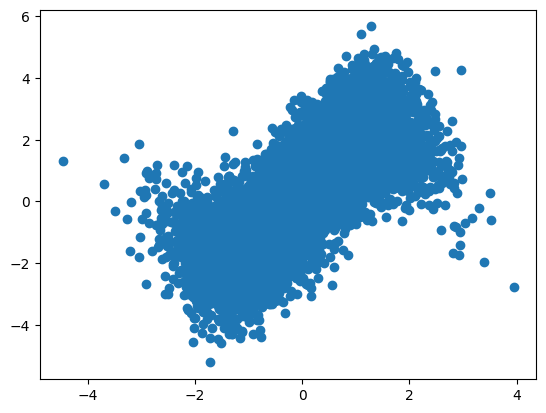

In [4]:
plt.scatter(x[:,1],y)
plt.show()

In [5]:
model = Sequential()
layers.Dense(128, activation='relu', input_shape=(10,), kernel_regularizer=tf.keras.regularizers.l2(0.001))
model.add(Dense(64, activation='relu'))
layers.Dropout(0.2)
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

his = model.fit(x, y, epochs=500, batch_size=32, validation_split=0.2)

C:\Users\witho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 1.7896 - mae: 1.0626 - val_loss: 1.1710 - val_mae: 0.8459
Epoch 2/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1809 - mae: 0.8529 - val_loss: 1.1182 - val_mae: 0.8270
Epoch 3/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1562 - mae: 0.8416 - val_loss: 1.1258 - val_mae: 0.8289
Epoch 4/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0995 - mae: 0.8282 - val_loss: 1.0897 - val_mae: 0.8212
Epoch 5/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0625 - mae: 0.8176 - val_loss: 1.0647 - val_mae: 0.8082
Epoch 6/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0486 - mae: 0.8118 - val_loss: 1.0581 - val_mae: 0.8077
Epoch 7/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0430 - mae: 0.8104 - val_loss: 1.0652 - val_mae: 0.8099
Epoch 8/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0264 - mae: 0.8024 - val_loss: 1.0455 - val_mae: 0.8031
Epoch 9/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/

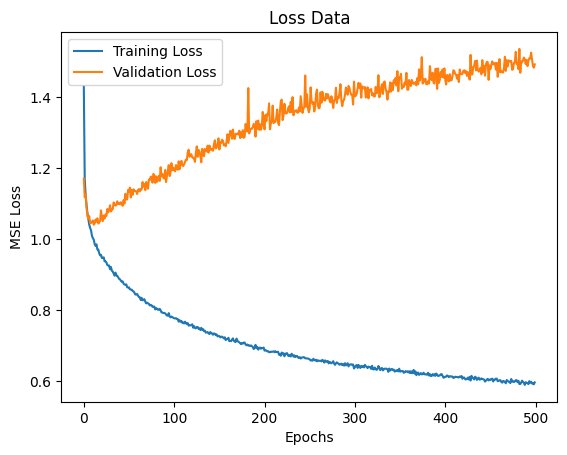

In [6]:
plt.plot(his.history['loss'], label='Training Loss')
plt.plot(his.history['val_loss'], label='Validation Loss')
plt.title("Loss Data")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

In [ ]:
print("\n Accuracy: %.4f" % (model.evaluate(x, y)[1]))


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - loss: 0.5805 - mae: 0.6017

 Accuracy: 0.6658


In [16]:
test = np.random.normal(loc=0.0, scale=1.0, size=(10, 10))
print(test)
print(model.predict(test))

[[ 0.80087386 -0.04915938 -0.44651263  0.16801498 -2.12677544 -1.88204812
   0.41008089 -1.48686947 -0.75067798  0.20924725]
 [ 0.88602028  0.38475216 -0.0891034  -0.01858936 -0.4147893   0.00870047
  -0.11724946  0.87659135 -0.01876202 -0.3790523 ]
 [ 0.85520865  0.16065146  0.38455556 -1.45318598 -0.97356476  0.08320801
   0.89125198  0.70067181 -0.71427347  0.35512581]
 [ 1.11707504 -0.4141535  -0.54810517  0.69203361  1.3139853   0.15662435
  -1.29532393  0.50963589  0.50078723  0.45144748]
 [-0.57075761  2.19414093  1.61668648 -0.13207762 -1.06365324 -0.5688695
   0.68091826  0.48094439  0.6049834   0.35215565]
 [ 0.88569842 -0.69911926 -0.7950009   0.22358002 -1.0584937  -1.54527859
   0.18641084 -0.65949736  0.11116974  0.24546379]
 [-0.77545888  0.0294451  -0.56154351 -1.49897816  0.46965475  1.22473808
   0.24076329  1.39172502  0.61945545 -0.65114242]
 [ 0.04944323  1.88741317 -0.6603189   0.08451678  1.00127793  0.8554516
  -0.62481295  1.9526491   0.04140389 -0.13274994]
 [